In [1]:
from navpy import ecef2lla, lla2ecef
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import math
import csv


d = 20
#lla = [lat,lon,alt] #[degree,degree,meter]
#ecef = [x,y,z] #[meter,meter,meter]


def Cylinder(location,R,H_min,H_max):
    path = []
    for i in range(d):
        for k in range(d):
            p = [R*math.cos(2*np.pi/d*i)+location[0], 
                 R*math.sin(2*np.pi/d*i)+location[1],
                (H_max-H_min)/d*k+H_min+location[2]]
            path.append(p)
    return np.asarray(path)

def Sphere(location,R,H_min,H_max):
    path = []
    for i in range(d):
        for j in range(d):
            if R*math.cos(np.pi/d*i)>=H_min:
                if R*math.cos(np.pi/d*i)<H_max:
                    p = [R*math.sin(np.pi/d*i)*math.cos(2*np.pi/d*j)+location[0], 
                         R*math.sin(np.pi/d*i)*math.sin(2*np.pi/d*j)+location[1],
                         R*math.cos(np.pi/d*i)+location[2]]
                    path.append(p)
    return np.asarray(path)

def Plane(location,P1,P2,H_min,H_max):
    P1 = lla2ecef(P1[0],P1[1],P1[2]) 
    P2 = lla2ecef(P2[0],P2[1],P2[2]) 
    for i in range(3):
        P1[i] = P1[i]-location[i]
        P2[i] = P2[i]-location[i]
    dir = [P1[0]-P2[0], P1[1]-P2[1]]
    path = []
    for i in range(d):
        D = [P2[0]+dir[0]/d*i, P2[1]+dir[1]/d*i]
        for k in range(d):
            p = [D[0]+location[0],D[1]+location[1],(H_max-H_min)/d*k+H_min+location[2]]
            path.append(p)
    return np.asarray(path)

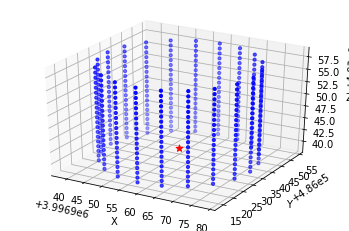

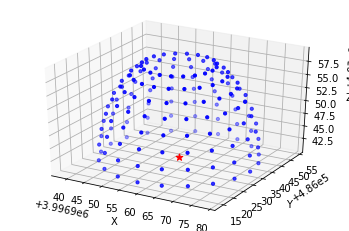

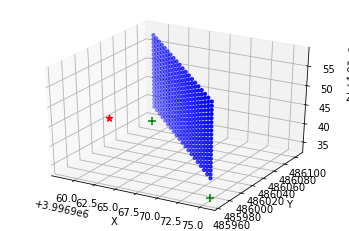

In [2]:
location = [50.949650,6.933180,30] #[lat,lon,alt] 
location_xyz = lla2ecef(location[0],location[1],location[2]) 
#print (location_xyz)

P1 = [50.949550,6.934180,30] #[lat,lon,alt] 
P2 = [50.949550,6.932180,30] #[lat,lon,alt] 
P1_xyz = lla2ecef(P1[0],P1[1],P1[2]) 
P2_xyz = lla2ecef(P2[0],P2[1],P2[2]) 
#print (P1_xyz)
#print (P2_xyz)

########################
xyz = Cylinder(location_xyz,20.0,-2,+18)
#print (xyz)

lla = ecef2lla(xyz)

f = open('path_Cylinder.csv','wt')
writer = csv.writer(f)
writer.writerow(('lat','lon','alt'))
for i in range(len(lla[0])):
        writer.writerow((lla[0][i],lla[1][i],lla[2][i]))
f.close()

#for i in range(len(lla[0])):
#    print ('lat','lon','alt')
#    print (lla[0][i],lla[1][i],lla[2][i])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],s=10,marker='o',color='b')
ax.scatter(location_xyz[0],location_xyz[1],location_xyz[2],s=50,marker='*',color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

########################
xyz = Sphere(location_xyz,20.0,-2,+18)
#print (xyz)

lla = ecef2lla(xyz)

f = open('path_Sphere.csv','wt')
writer = csv.writer(f)
writer.writerow(('lat','lon','alt'))
for i in range(len(lla[0])):
        writer.writerow((lla[0][i],lla[1][i],lla[2][i]))
f.close()

#for i in range(len(lla[0])):
#    print ('lat','lon','alt')
#    print (lla[0][i],lla[1][i],lla[2][i])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],s=10,marker='o',color='b')
ax.scatter(location_xyz[0],location_xyz[1],location_xyz[2],s=50,marker='*',color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

########################
xyz = Plane(location_xyz,P1,P2,-2,+18)
#print (xyz)

lla = ecef2lla(xyz)

f = open('path_Plane.csv','wt')
writer = csv.writer(f)
writer.writerow(('lat','lon','alt'))
for i in range(len(lla[0])):
        writer.writerow((lla[0][i],lla[1][i],lla[2][i]))
f.close()

#for i in range(len(lla[0])):
#    print ('lat','lon','alt')
#    print (lla[0][i],lla[1][i],lla[2][i])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],s=10,marker='o',color='b')
ax.scatter(location_xyz[0],location_xyz[1],location_xyz[2],s=50,marker='*',color='r')
ax.scatter(P1_xyz[0],P1_xyz[1],P1_xyz[2],s=50,marker='+',color='g')
ax.scatter(P2_xyz[0],P2_xyz[1],P2_xyz[2],s=50,marker='+',color='g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()